 # 🍄Mushroom Classification🍄

### `Approach`: 
**The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.**

 `Attribute Information`: (classes: e=edible, p=poisonous)

* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n

* gill-spacing: close=c,crowded=w,distant=d

* gill-size: broad=b,narrow=n

* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t

* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u

* veil-color: brown=n,orange=o,white=w,yellow=y

* ring-number: none=n,one=o,two=t

* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
#Importing relevent libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#importing dataset
df=pd.read_csv('archive (9).zip')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**EDA Section**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

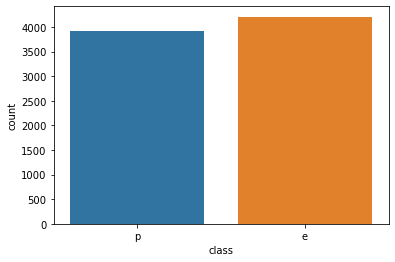

In [6]:
sns.countplot('class',data=df);

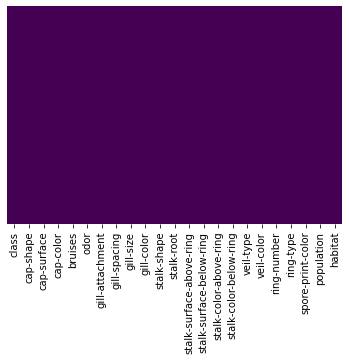

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis',);

In [8]:
df['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

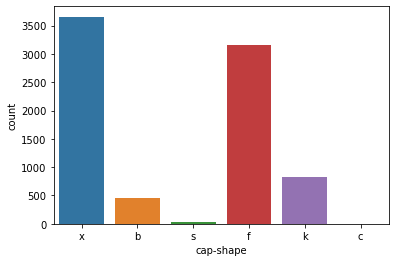

In [9]:
sns.countplot('cap-shape',data=df);

In [10]:
df.groupby(['cap-shape','cap-color']).size().reset_index().head()

,cap-shape,cap-color,0
0,b,b,12
1,b,g,48
2,b,n,56
3,b,p,12
4,b,w,190


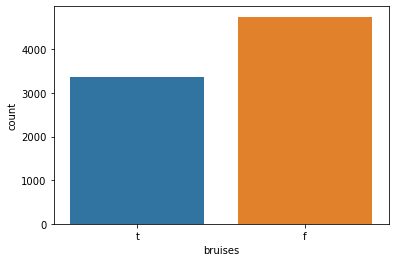

In [11]:
sns.countplot(df['bruises']);

From above plot graph it seem that most Mushroom don't have `bruises`

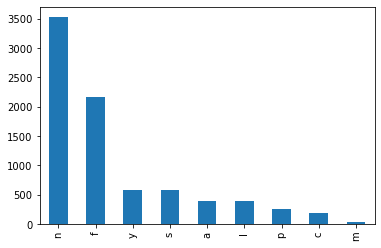

In [12]:
df['odor'].value_counts().plot(kind='bar');

odor:`almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s`

From these we can conclude that most of the  Mushrooms🍄  are odorless

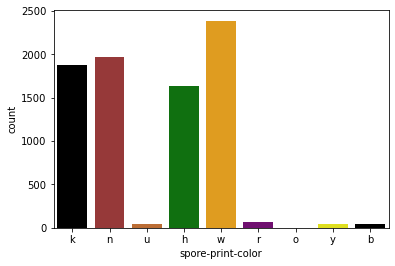

In [13]:
sns.countplot(x="spore-print-color",data=df,palette=['black','brown','chocolate','green','orange','purple','white','yellow']);


 `black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y`
 
 From these graph we can observe that most of the spore color is beloning to white color
 

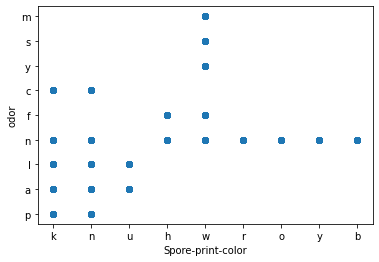

In [14]:
plt.scatter(df['spore-print-color'],df['odor'])
plt.xlabel('Spore-print-color')
plt.ylabel('odor');

In [15]:
df['population'].value_counts()

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64

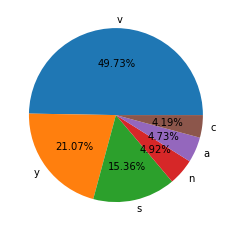

In [16]:
plt.pie(df['population'].value_counts(),labels=df['population'].value_counts().index,autopct="%1.2f%%");


abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

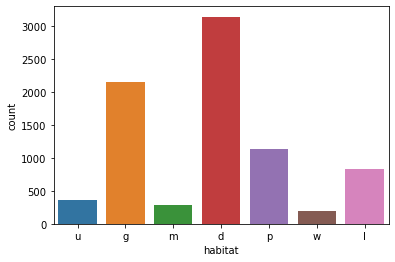

In [17]:
sns.countplot(df['habitat']);

habitat: `grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d`

**preprocessing data**

In [18]:
#Using label encoding for the objective fuction
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [19]:
new_df=df.apply(label.fit_transform)


In [20]:
new_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [21]:
new_df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

In [22]:
new_df['class'].unique()

array([1, 0])

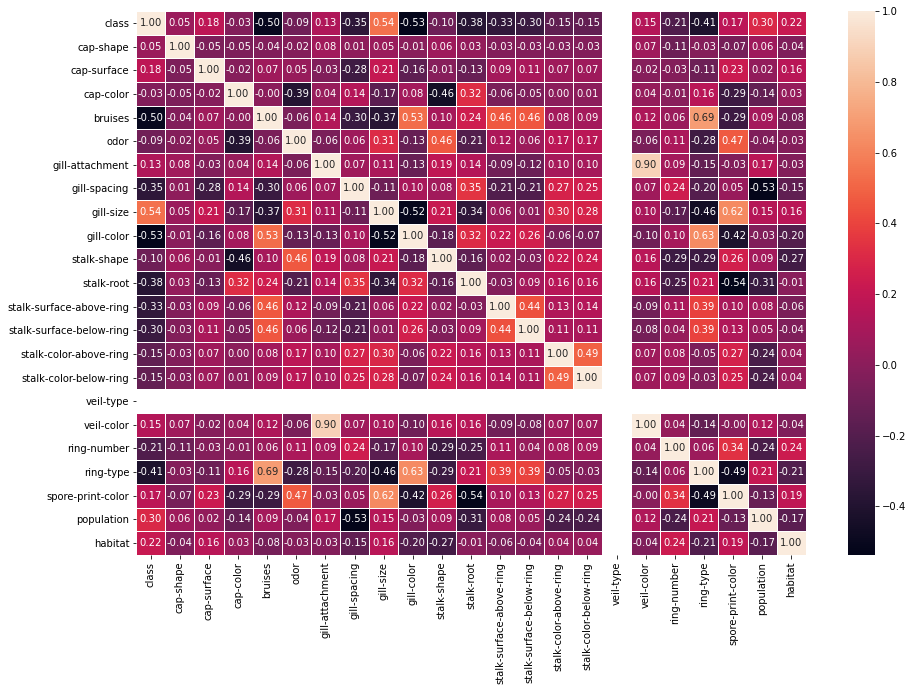

In [23]:
corr_matrix = new_df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f")


**modeling training**

In [27]:
X=new_df.drop('class',axis=1)
y=new_df['class']

In [28]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [29]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [30]:
len(X),len(y)

(8124, 8124)

In [31]:
#Spliting dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2)


In [33]:
len(X_train),len(X_test),len(y_train),len(y_test)

(6499, 1625, 6499, 1625)

In [34]:
#Importing models from sklearn
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
469,2,3,9,1,0,1,0,0,10,0,...,3,7,7,0,2,1,4,3,3,4
1700,5,0,4,1,5,1,0,0,10,1,...,2,7,3,0,2,1,4,2,5,0
3511,5,3,3,0,2,1,0,0,3,0,...,1,0,6,0,2,1,2,1,4,0
532,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,1
4903,5,3,2,0,8,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,5,0,4,0,5,1,1,0,3,1,...,2,7,7,0,2,1,0,3,0,1
3816,2,0,2,1,5,1,0,0,7,1,...,2,3,6,0,2,1,4,3,4,0
3784,2,3,3,1,5,1,0,0,9,1,...,2,6,6,0,2,1,4,3,5,0
5013,5,3,9,0,2,1,0,0,7,0,...,1,0,0,0,2,1,2,1,4,4


In [43]:
#Putting Models into Dictonory

models = {"Logistic Regression": LogisticRegression(),
        "KNM": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

#Creating a function to fit and Score models
def fit_and_score(models , X_train, X_test, y_train , y_test):
    """
    Fits and evluate given machine learnig models.
    models: a dict of diffrent Scikit-learn machine learnig models
    X_train : training data (no- labels)
    X_test: testing data(no-lables)
    y_train: training the data
    y_test: test_lables
    """
    # set random seed
    np.random.seed(42)
    # Make a dictinory to keep models scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        #fit the model to the data 
        model.fit(X_train , y_train)
        #Evluate the model and  append its score to model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [44]:
model_scores= fit_and_score(models= models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

{'Logistic Regression': 0.947076923076923,
 'KNM': 0.9987692307692307,
 'Random Forest': 1.0}

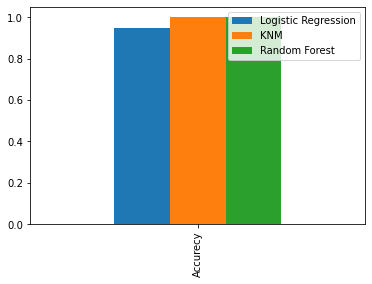

In [53]:
model_comapre=pd.DataFrame(model_scores,index=['Accurecy'])
model_comapre.plot.bar();
# plt.figure(figsize=(10,7));

## KNeighborsClassifier

In [83]:
knn=KNeighborsClassifier(5)

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [84]:
y_pred=knn.predict(X_test)


In [85]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9987692307692307


In [86]:
    knn.score(X_test,y_test)

0.9987692307692307

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       818
           1       1.00      1.00      1.00       807

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [92]:
print(confusion_matrix(y_pred,y_test))

[[816   0]
 [  2 807]]


### Logistic Regression

In [94]:
## Logistic Regression

log_reg = LogisticRegression()


#fitung model with data
log_reg.fit(X_train,y_train)


pred=log_reg.predict(X_test)

In [96]:
print(confusion_matrix(y_test,pred))

[[788  30]
 [ 56 751]]


In [97]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       818
           1       0.96      0.93      0.95       807

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



**from above model training and testing we reaching to the result is that KNeighborsClassifier(KNN) giving us `99.87` accuracy and it perfoming well than other models. **

In [98]:
    knn.score(X_test,y_test)

0.9987692307692307